In [26]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 

- plot variance of ubar and divF (level, lat)

- plot corr(ubar, N3.4) on (level, lat) - N34 doesnt change every grid point

- EFP for summer (all hemis and seasons)

- polar vortex u @ 10hPa, 60N

In [2]:
# import dataset
ds = xr.open_mfdataset('/home/links/ct715/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
                            parallel=True, chunks={'time': 31})
ds

<xarray.Dataset>
Dimensions:  (time: 5325, lon: 144, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ubar     (level, lat) float32 dask.array<chunksize=(37, 73), meta=np.ndarray>

In [17]:
ubar = ds.u.mean(('lon')).load()
ubar = ubar.where( ds.level > 100., drop=True )

var = ubar.var(dim='time').load()

<xarray.DataArray 'level' (level: 26)>
array([ 125.,  150.,  175.,  200.,  225.,  250.,  300.,  350.,  400.,  450.,
        500.,  550.,  600.,  650.,  700.,  750.,  775.,  800.,  825.,  850.,
        875.,  900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level    (level) float64 125.0 150.0 175.0 200.0 ... 925.0 950.0 975.0 1e+03

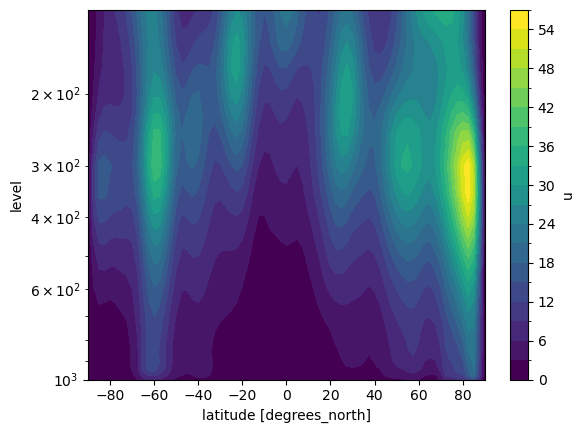

In [19]:
var.plot.contourf(levels=20, yincrease=False, yscale='log')

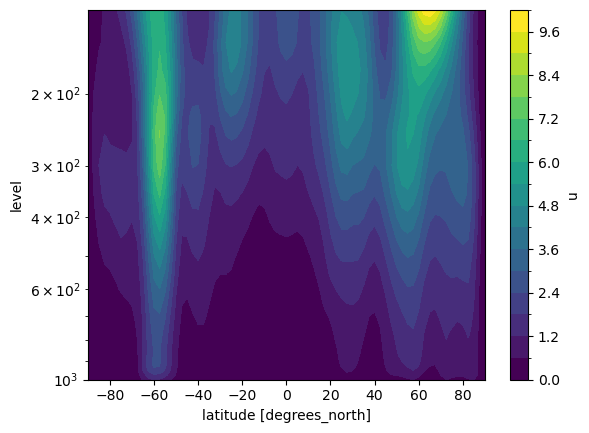

In [25]:
ubar = ds.u.mean(('lon')).load()
ubar = ubar.where( ds.level > 100., drop=True )
ubar = ubar.groupby('time.year').mean('time').load()

var = ubar.var(dim='year')

var.plot.contourf(levels=20, yincrease=False, yscale='log')

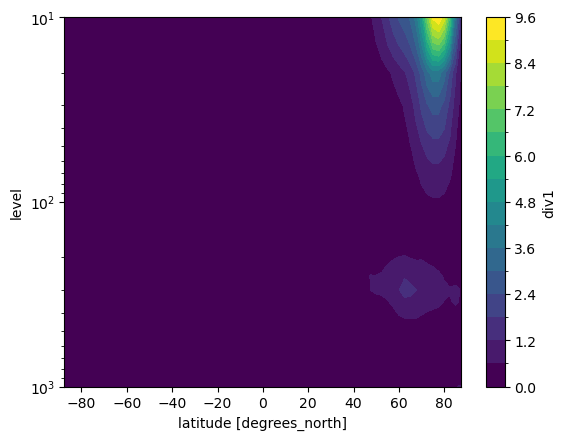

In [32]:
div1 = ds.div1
div1 = div1.groupby('time.year').mean('time').load()

div1 = div1.where( ds.level >= 10., drop=True )
div1 = div1.isel(lat=slice(1,72))

var = div1.var(dim='year')

var.plot.contourf(levels=20, yincrease=False, yscale='log')

lon is here bruv


In [ ]:
def interannual(da):
    
    # average longitude if not already done
    if 'lon' in da.dims:
        da = da.mean('lon')
        
    da = da.groupby('time.year').mean('time').load()
    
    return da 
    


def plot_variance(ds, top_atmos=0., latitude=None, primitive=True):
    
    """
    Input: DataArray of required variable with three dimensions
            - Usually (time, level, lat)
            
    Output: Contour plot showing (lat, level) variance
    
    """
    
    ## CONDITIONS
    
    # ensure variables are named correctly
    if 'lat' and 'lon' and 'level' and 'u' and 'v' and 't' not in ds:
        ds = ef.find_rename_variables(ds)  
    
    # Check to see if EP fluxes are in DataSet
    if not 'ep1' in ds:
        ds = ef.calculate_epfluxes_ubar(ds, primitive=primitive)
    
    # set top of atmosphere
    ds = ds.where( ds.level >= top_atmos )
    
    # Choose hemisphere, if required
    if latitude == 'NH':
        ds = da.where( ds.lat >= 0., drop=True )
    if latitude == 'SH':
        da = ds.where( ds.lat <= 0., drop=True )
        
    #-------------------------------------------------------------------
    
    
        
    
    